## Morphologie Mathématique

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import ndimage

# Configuration
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['image.cmap'] = 'gray'


## Exercice 1 : Dilatation

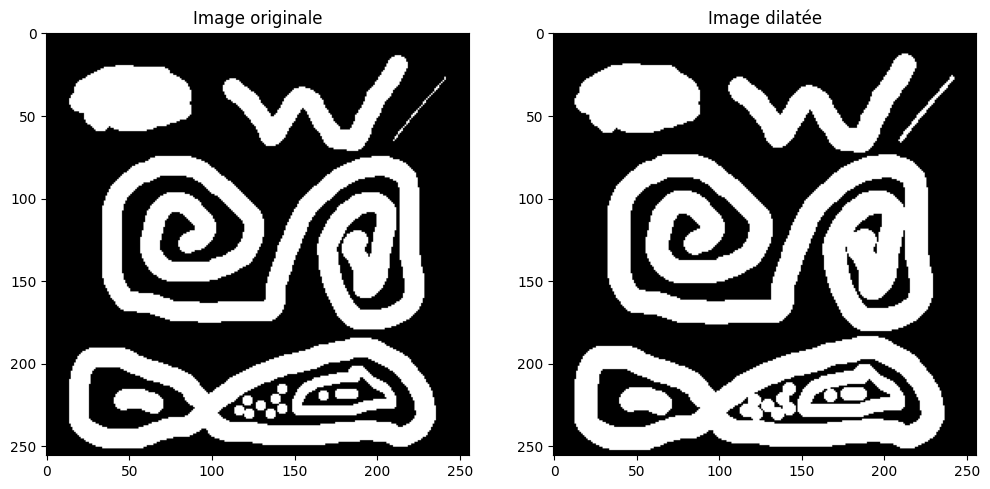

In [35]:
def dilate(image, kernel):
    rows, cols = image.shape
    k_rows, k_cols = kernel.shape

    offset_row = k_rows // 2
    offset_col = k_cols // 2

    output = np.zeros_like(image, dtype=np.uint8)
    # Réaliser la dilutation
    for i in range(rows):
        for j in range(cols):
            max_val = 0
            
            for ki in range(k_rows):
                for kj in range(k_cols):
                    if kernel[ki, kj] > 0:
                        img_i = i  + ki - offset_row
                        img_j = j + kj - offset_col

                        if 0 <= img_i < rows and 0 <= img_j < cols:
                            max_val = max(max_val, image[img_i, img_j])
            output[i, j] = max_val
    return output

plt.figure(figsize=(12, 6))

image = cv2.imread('img/binary.png', cv2.IMREAD_GRAYSCALE)
kernel = np.array([0, 1, 0, 1, 1, 1, 0, 1, 0]).reshape((3, 3))

dilated_image = dilate(image, kernel)

plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Image dilatée')
plt.imshow(dilated_image, cmap='gray')


## Exercice 2 : Erosion

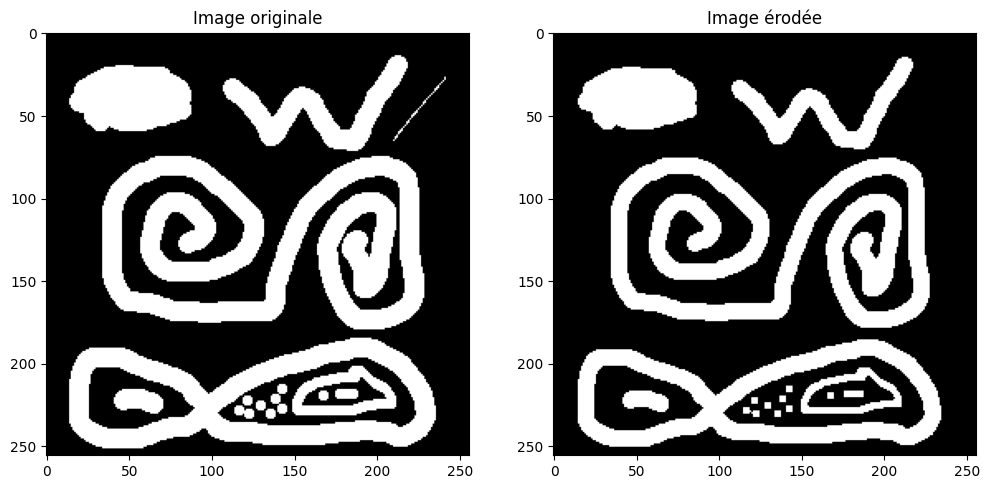

In [36]:
def erosion(image, kernel):

    rows, cols = image.shape
    k_rows, k_cols = kernel.shape

    offset_row = k_rows // 2
    offset_col = k_cols // 2

    output = np.zeros_like(image, dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            min_val = 255
            found_pixel = False

            for ki in range(k_rows):
                for kj in range(k_cols):
                    if kernel[ki, kj] > 0:
                        img_i = i + ki - offset_row
                        img_j = j + kj - offset_col

                        if 0 <= img_i < rows and 0 <= img_j < cols:
                            found_pixel = True
                            min_val = min(min_val, image[img_i, img_j])

            if found_pixel:
                output[i, j] = min_val
            else:
                output[i, j] = 0
    return output

plt.figure(figsize=(12, 6))

image = cv2.imread('img/binary.png', cv2.IMREAD_GRAYSCALE)
kernel = np.array([0, 1, 0, 1, 1, 1, 0, 1, 0]).reshape((3, 3))
eroded_image = erosion(image, kernel)

plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Image érodée')
plt.imshow(eroded_image, cmap='gray')


## Exercice 3 : Fermeture

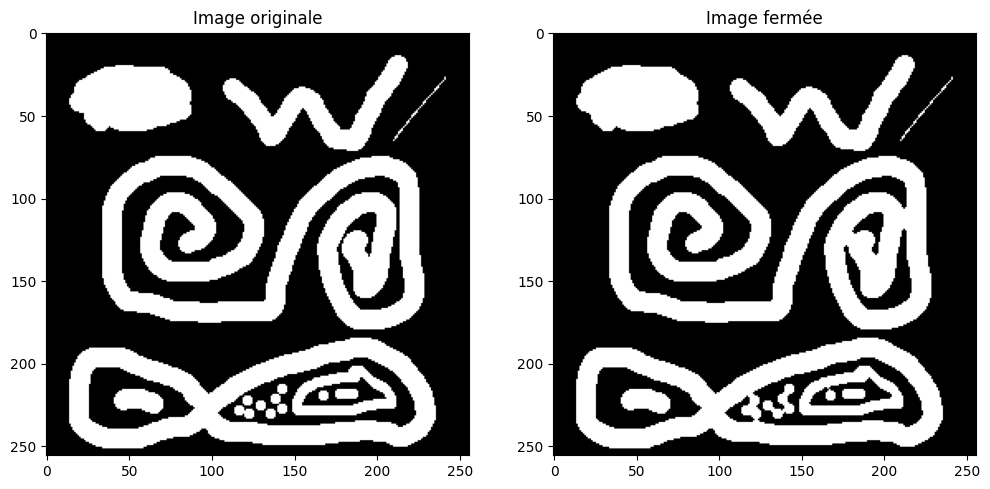

In [37]:
def close(image, kernel):
    # etape 1 : Dilatation
    dilated = dilate(image, kernel)
    # etape 2 : Erosion
    close = erosion(dilated, kernel)
    return close

image = cv2.imread('img/binary.png', cv2.IMREAD_GRAYSCALE)
kernel = np.array([0, 1, 0, 1, 1, 1, 0, 1, 0]).reshape((3, 3))
closed_image = close(image, kernel)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Image fermée')
plt.imshow(closed_image, cmap='gray')

## Exercice 4 : Ouverture

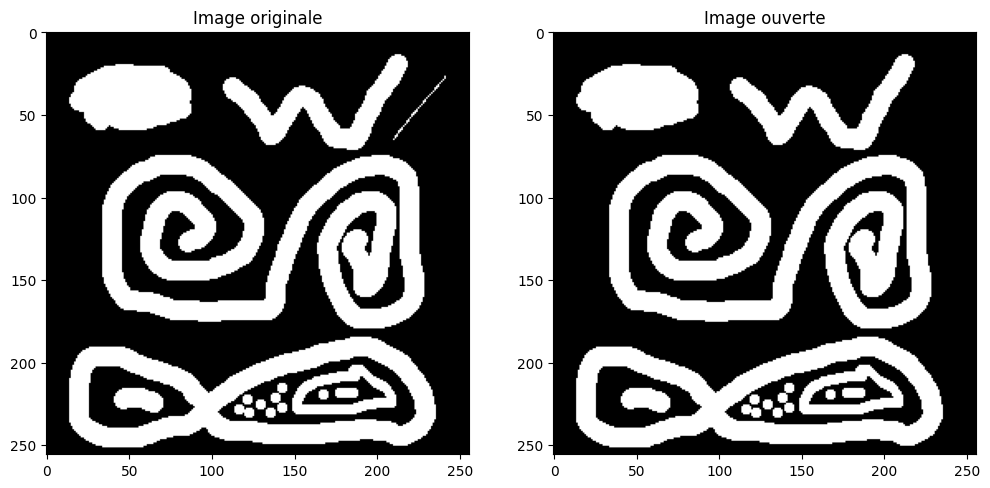

In [38]:
def open(image, kernel):
    # étape 1 : Erosion
    eroded = erosion(image, kernel)

    # étape 2 : Dilatation
    opened = dilate(eroded, kernel)

    return opened

plt.figure(figsize=(12, 6))

image = cv2.imread('img/binary.png', cv2.IMREAD_GRAYSCALE)
kernel = np.array([0, 1, 0, 1, 1, 1, 0, 1, 0]).reshape((3, 3))
opened = open(image, kernel)

plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2,)
plt.title('Image ouverte')
plt.imshow(opened, cmap='gray')


## Exercice 5 : Gradient morphologique

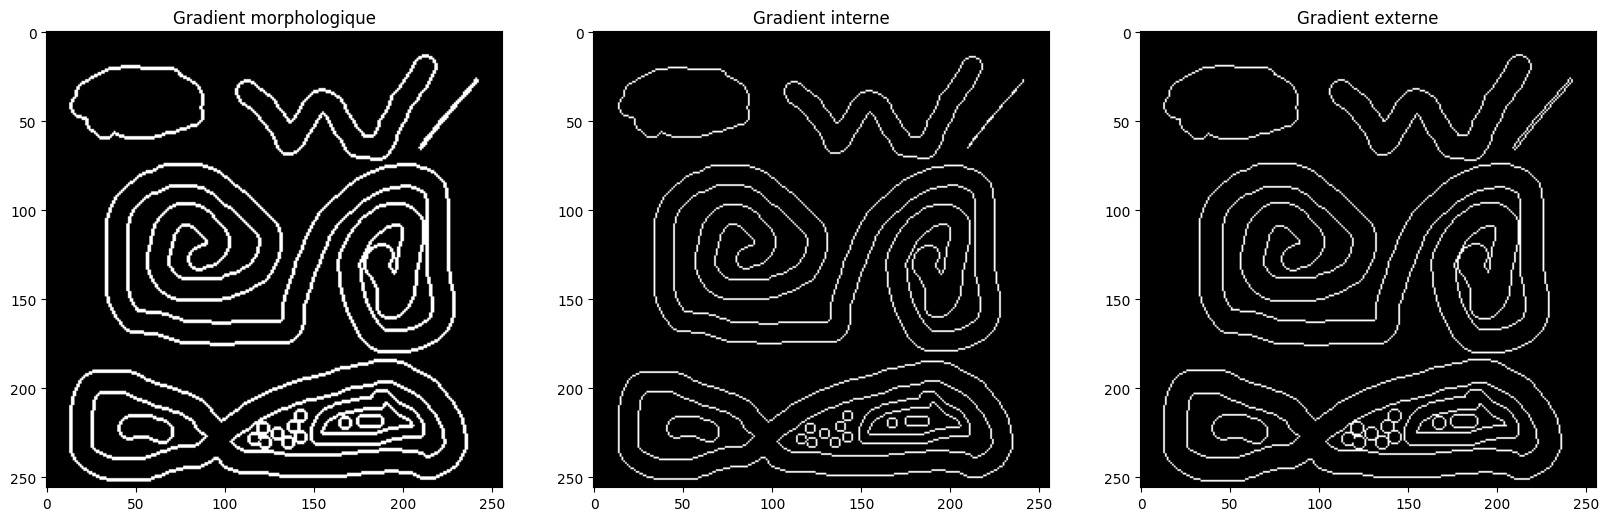

In [ ]:
def gradient(image, kernel):
    # Implication des deux opérations de base 
    dilated = dilate(image, kernel)
    eroded = erosion(image, kernel)

    # Calculer le gradient morphologique
    gradient = dilated.astype(np.int16) - eroded.astype(np.int16)

    # Conversion
    gradient = np.clip(gradient, 0, 255).astype(np.uint8)

    return gradient

def internal_gradient(image, kernel):
    # Implication des deux opérations de base
    eroded = erosion(image, kernel)
    gradient = image.astype(np.int16) - eroded.astype(np.int16)
    # Retourner une image de type uint8
    return np.clip(gradient, 0, 255).astype(np.uint8)

def external_gradient(image, kernel):

    dilated = dilate(image, kernel)
    gradient = dilated.astype(np.int16) - image.astype(np.int16)

    return np.clip(gradient, 0, 255).astype(np.uint8)

# Test des fonctions de gradient (morphologique, interne et externe)
image = cv2.imread('img/binary.png', cv2.IMREAD_GRAYSCALE)
kernel = np.array([0, 1, 0, 1, 1, 1, 0, 1, 0]).reshape((3, 3))

morph_gradient = gradient(image, kernel)
intern_gradient = internal_gradient(image, kernel)
extern_gradient = external_gradient(image, kernel)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.title('Gradient morphologique')
plt.imshow(morph_gradient, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Gradient interne')
plt.imshow(intern_gradient, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Gradient externe')
plt.imshow(extern_gradient, cmap='gray')
